# **HandWritten Digit Recognition**
## <u>Biological and Artificial Neurons</u>
Biological neurons communicate using electrical impulses and neurotransmitters, forming complex, interconnected networks that process information.They  enable complex thought and learning.

Artificial neurons, inspired by biological ones, use binary inputs and outputs to perform logical computations like AND, OR, and NOT operations.Ttey provide a simplified mathematical model for computational tasks.

### <u>The Perceptron</u>
The Perceptron is a simple artificial neural network introduced by Frank Rosenblatt in 1957. It consists of threshold logic units (TLUs), where each unit computes a weighted sum of its inputs and applies a step function to determine the output:
$$
h_{W,b}(X) = \phi (XW + b)
$$
- X: Input features.  
- W: Weights matrix.  
- b: Bias vector.  
- ϕ: Activation function.  

The Perceptron learning rule updates weights based on errors, inspired by Hebbian learning. The perceptron learning rule is:
$$ w_{i,j}^{(t+1)} = w_{i,j}^{(t)} + \eta (y_j - \hat{y}_j)x_i $$
However, it is limited to linearly separable problems, leading to the development of Multilayer Perceptrons (MLPs) for solving complex tasks like XOR classification.

Perceptrons do not output probabilities, lack regularization, stop training early after zero errors, and may generalize worse than logistic regression or SVM, but they can train faster.

### <u>Multilayer Perceptron (MLP) and Backpropagation</u>

**A Multilayer Perceptron (MLP)** is a type of artificial neural network composed of:
- Input Layer: Takes the input features.
- Hidden Layers: Contain neurons that process inputs using activation functions.
- Output Layer: Produces the final prediction.

**Backpropagation Algorithm**
Backpropagation is the process of updating weights using gradient descent:
1. Compute the weighted sum of inputs and apply an activation function.THEN Pass results to the next layer until reaching the output.
2. Compare predicted output with actual values using a loss function.
3. Compute the gradient of the loss with respect to each weight.THEN Adjust weights using gradient descent.

**Common activation functions**:
- **Sigmoid**: $\sigma(z) = \frac{1}{1 + e^{-z}}$ 
- **Tanh**: $\tanh(z) = 2\sigma(2z) - 1$ 
- **ReLU**: $ReLU(z) = \max(0, z)$ 

 

### <u>Regression and Classification MLPs</u>

**Number of Output Neurons**  
- Regression: One neuron for a single value or multiple neurons for multi-output.  
- Classification: One neuron for binary classification, multiple neurons for multiclass classification.

**Activation Function in Output Layer**  
- Regression: None , or ReLU/Sigmoid/Tanh if bounded output is needed.  
- Classification: Sigmoid for binary classification, Softmax for multiclass classification.

**Loss Function**  
- Regression: MSE or Huber.  
- Classification: log loss.

**Output Interpretation**  
- Regression: Direct numerical values.  
- Classification: Probabilities (0-1 for sigmoid, class probabilities summing to 1 for softmax).


## <u>Implementing MLPs with Keras</u>

In [39]:
import tensorflow as tf

In [40]:
# load the dataset
mnist = tf.keras.datasets.mnist.load_data()

In [41]:
# split dataset into train ,test sets
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000] # actual training
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:] # validation

In [42]:
# scale pixel values between 0 and 1
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255., X_test / 255.0

In [43]:
tf.random.set_seed(42) # set random seed to make the results reproducible

# define a neural network with three layers
model = tf.keras.Sequential([ 
tf.keras.layers.Flatten(input_shape=[28, 28]),          
tf.keras.layers.Dense(300, activation="relu"),          
tf.keras.layers.Dense(100, activation="relu"),  
tf.keras.layers.Dense(10, activation="softmax")         
 ])

In [44]:
# display all the model’s layers
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# configuring the model (loss function , optimizer and tracking )
model.compile(loss="sparse_categorical_crossentropy", 
optimizer="sgd",                                        
metrics=["accuracy"])                                  

In [58]:
# Train dataset for 10 iterations
history = model.fit(X_train, y_train, epochs=15,validation_data=(X_valid, y_valid))

Epoch 1/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9724 - loss: 0.0994 - val_accuracy: 0.9738 - val_loss: 0.0935
Epoch 2/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9741 - loss: 0.0918 - val_accuracy: 0.9734 - val_loss: 0.0901
Epoch 3/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9763 - loss: 0.0850 - val_accuracy: 0.9742 - val_loss: 0.0873
Epoch 4/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9781 - loss: 0.0789 - val_accuracy: 0.9750 - val_loss: 0.0848
Epoch 5/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9796 - loss: 0.0734 - val_accuracy: 0.9750 - val_loss: 0.0827
Epoch 6/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9810 - loss: 0.0684 - val_accuracy: 0.9756 - val_loss: 0.0809
Epoch 7/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1007s 586ms/step - accuracy: 0.9825 - loss: 0.0639 - val_accuracy: 0.9762 - val_loss: 0.0792
Epoch 8/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9840 - loss: 

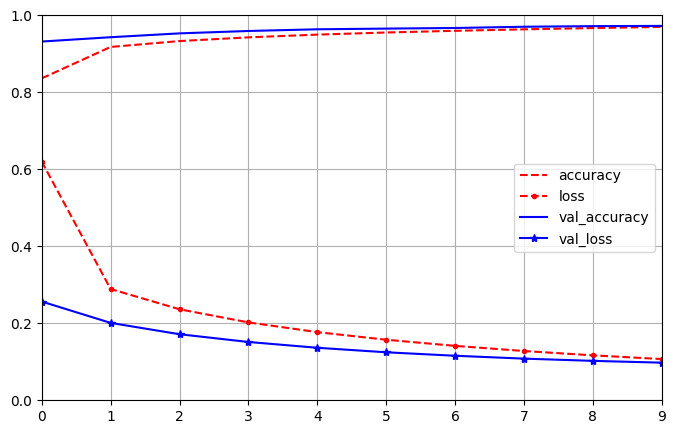

In [48]:
# analyze training performance
import matplotlib.pyplot as plt
import pandas as pd 
pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=[0, 9], ylim=[0, 1], grid=True ,style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [59]:
loss , acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9733 - loss: 0.0884
Test accuracy: 0.98


In [60]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
print (y_proba) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[6.4093520e-06 5.7912592e-07 4.9289283e-05 9.4758481e-04 1.3446608e-09
  5.3160493e-06 1.3151600e-11 9.9895906e-01 4.7386875e-06 2.6922458e-05]
 [5.8035084e-07 8.7709210e-05 9.9980778e-01 9.8465251e-05 2.0884709e-10
  2.1819651e-06 1.8605494e-06 1.0750855e-10 1.4949820e-06 1.5939803e-12]
 [8.9156156e-06 9.9611878e-01 1.0128804e-03 9.3524053e-05 3.0428922e-04
  1.1392046e-04 2.5799198e-05 1.2204964e-03 1.0802165e-03 2.1232470e-05]]


In [57]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
print(y_pred)

[7 2 1]
